<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/clustering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/adult.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
!pip install -U scikit-learn # update scikit-learn to the latest version
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Select numerical features
numerical_features = ['Age', 'fnlgwt', 'Education Num', 'Capital Gain', 'Capital Loss', 'Hours/Week']
X = data[numerical_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward') # use metric instead of affinity
data['cluster'] = cluster.fit_predict(X_scaled)

# Analyze the clusters
print(data.groupby('cluster')['Above/Below 50k'].value_counts())

cluster  Above/Below 50k
0         <=50K             24012
          >50K               7070
1         >50K                771
          <=50K               708
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
# Assuming 'Above/Below 50k' is your target variable and you want to see how well the clusters
# align with it, you can treat one cluster as the positive class and the other as the negative class.
# Here, we assume cluster 0 is the positive class. You might need to adjust this based on your data.

# Convert 'Above/Below 50k' to binary labels (1 for '>50K', 0 for '<=50K')
data['target'] = data['Above/Below 50k'].apply(lambda x: 1 if x == '>50K' else 0)

# Calculate the metrics
accuracy = accuracy_score(data['target'], data['cluster'])
recall = recall_score(data['target'], data['cluster'])
f1 = f1_score(data['target'], data['cluster'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Analyze the clusters
print(data.groupby('cluster')['Above/Below 50k'].value_counts())

Accuracy: 0.9546
Recall: 0.0000
F1-Score: 0.0000
cluster  Above/Below 50k
0         <=50K             24012
          >50K               7070
1         >50K                771
          <=50K               708
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(data.groupby('cluster')['target'].value_counts(normalize=True))

cluster  target
0        0         1.0
1        0         1.0
Name: proportion, dtype: float64


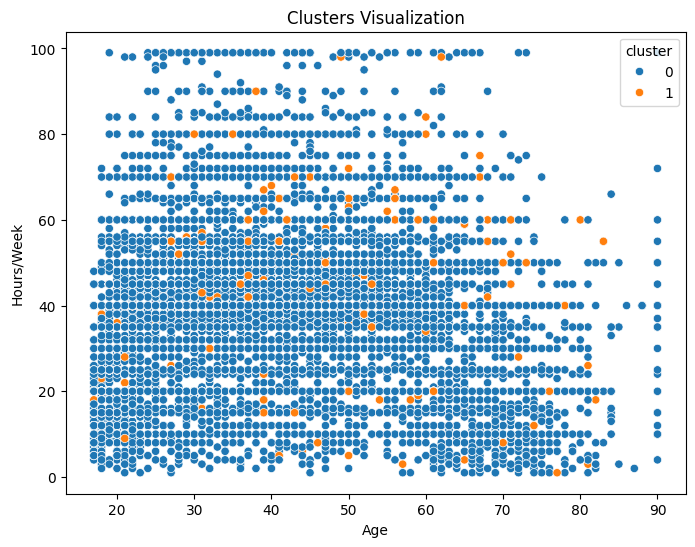

In [ ]:
# Example using a scatter plot for Age and Hours/Week (adjust features as needed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Hours/Week', hue='cluster', data=data)
plt.title('Clusters Visualization')
plt.show()